# Bureau of Meteorology (BoM) Solar Irradiace Products

* **Products used:**
[Solar Irradiance](https://dapds00.nci.org.au/thredds/catalog/rv74/satellite-products/arc/der/himawari-ahi/solar/p1d/latest/catalog.html)

## Background

Surface solar irradiance measurements are increasingly critical to the solar energy industry and are important to evaluate weather and climate model.Solar irradiance is the power per unit area received from the sun in the form of electromagnetic radiation measured in Watt per square metre (W/m2). 

Bureau of Meteorology (BoM) employed the Heliosat-4 radiation model (Qu et al, 2017) as implemented by Mines ParisTech (Gschwind et. al., 2020) to estimate downwelling solar radiation parameters. Heliosat-4 uses estimates of cloud properties derived from satellite observations, estimates of aerosol optical depth, and forecasts of atmospheric ozone and water vapour to estimate instantaneous surface global solar irradiance, known as global horizontal irradiance (GHI) in units of W/m2. Heliosat-4 also produces estimates of the instantaneous intensity of surface direct horizontal irradiance (BHI) in units of W/m2, from which the solar direct beam radiation falling on a surface normal to the beam, known as the direct normal irradiance (DNI) with units W/m2 is calculated. The daily global solar exposure (also known as "daily solar insolation" or "daily radiant exposure") is the integral of surface downwelling shortwave flux in air during a day in units of megajoules per square metre (MJ/m2). 

For further detail on the solar irradiance products, please see the [Gridded satellite solar observations project: Implementation of Heliosat-4 and the application of bias correction](http://www.bom.gov.au/research/publications/researchreports/BRR-062.pdf) research report.  

## Description

This notebook demonstrates how to load, visualise and plot BoM's daily solar irradiance data. It includes the following steps:
1. Access daily solar irradiance products from NCI's THREDDS server
2. Visualise the daily solar irradiance measurements at an example timestamp
3. Plot time-series daily solar irradiance
4. Compare time-series daily solar irradiance between two solar farm locations

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline
import datacube
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import pandas as pd
from dea_tools.plotting import display_map, rgb
from load_solar_irradiance import load_solar_irradiance

### Analysis parameters

We define a few parameters for the data query and download:
* lat: The central latitude to analyse, e.g. -34.756
* lon: The central longitude to analyse, e.g. 143.509
* buffer: The number of degrees to load around the central latitude and longitude, e.g. 0.05. Setting lower number limits amount of data and allows quicker loading. 
* time_range: The date range to analyse, e.g. ('2022-01-01', '2023-01-01')
* var_names: Product measurement names to query, e.g. ['daily_integral_of_surface_global_irradiance','daily_integral_of_direct_normal_irradiance'].

In [2]:
# Define buffer around selected location
buffer=0.05

# around Limondale Solar Farm, NSW
lat=-34.756
lon=143.509

# Define the analysis region (Lat-Lon box)
lat_range = (lat-buffer,lat+buffer)
lon_range = (lon-buffer,lon+buffer)

# Define the time window
time = ("2022-01-01", "2023-01-01")

# Define measurements to query
var_names=['daily_integral_of_surface_global_irradiance',
           'daily_integral_of_direct_normal_irradiance']

## View the queried location

The solar farm is located in NSW:

In [3]:
display_map(x=lon_range, y=lat_range)

## Load data

We create and use a function `load_solar_irradiance` to load the data using the previously defined parameters. After the loading is complete we print out the loaded dataset:

In [4]:
# Retrieve surface soil moisture using query parameters
daily_solar_irrd = load_solar_irradiance(lat_range, lon_range, time, var_names=var_names)
daily_solar_irrd

loading daily observations...


  0%|          | 1/366 [00:03<19:17,  3.17s/it]

Dataset time attribute out of queried time range, skipping it...


100%|██████████| 366/366 [02:43<00:00,  2.23it/s]


merging datasets...


<xarray.Dataset>
Dimensions:                                      (time: 365, latitude: 6,
                                                  longitude: 6)
Coordinates:
  * time                                         (time) datetime64[ns] 2022-0...
  * latitude                                     (latitude) float32 -34.8 ......
  * longitude                                    (longitude) float32 143.5 .....
Data variables:
    daily_integral_of_surface_global_irradiance  (time, latitude, longitude) float64 ...
    daily_integral_of_direct_normal_irradiance   (time, latitude, longitude) float64 ...
Attributes: (12/55)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  The following acknowledgement is require...
    cdm_data_type:                   grid
    comment:                         Solar radiation data derived from satell...
    contributor_name:                Mines ParisTech; Commonwealth of Austral...
    ...                              ...
    source:                          IDE00326.202201011830.nc [uuid: dc269487...
    uuid:                            c85fd455-49f1-4e5b-a0a8-40b1bdc3ed3a
    date_created:                    20220427T044245Z
    quality:                         0
    quality_meaning:                 0: no_known_issues 1: medium 2: low 4: poor
    history:                         heliosat-4; post_process_p1s.py, post_pr...

### Plot example timestep

Change the value for timestep and re-run the cell to plot a different timestep (timesteps are numbered from 0 to `n_time - 1` where `n_time` is the total number of timesteps; see the time listing under the Dimensions category in the dataset print-out above).

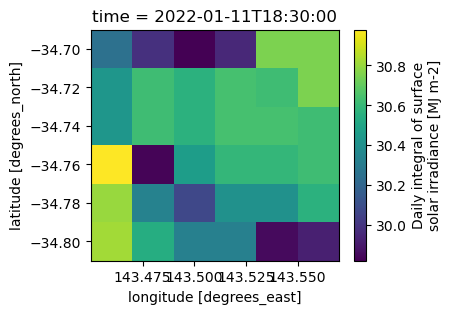

In [5]:
# Set the timesteps to visualise
timestep = 10
daily_solar_irrd.isel(time=timestep).daily_integral_of_surface_global_irradiance.plot(size=3)

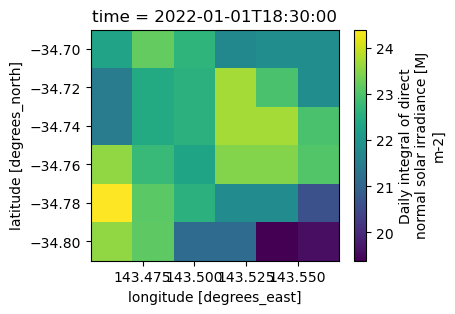

In [6]:
daily_solar_irrd.isel(time=0).daily_integral_of_direct_normal_irradiance.plot(size=3)

### Plot time series

Now we plot the time-series daily irradiance for the entire selected period. We can observe clearly the seasonal variation, i.e. high in summer and low in winter days.

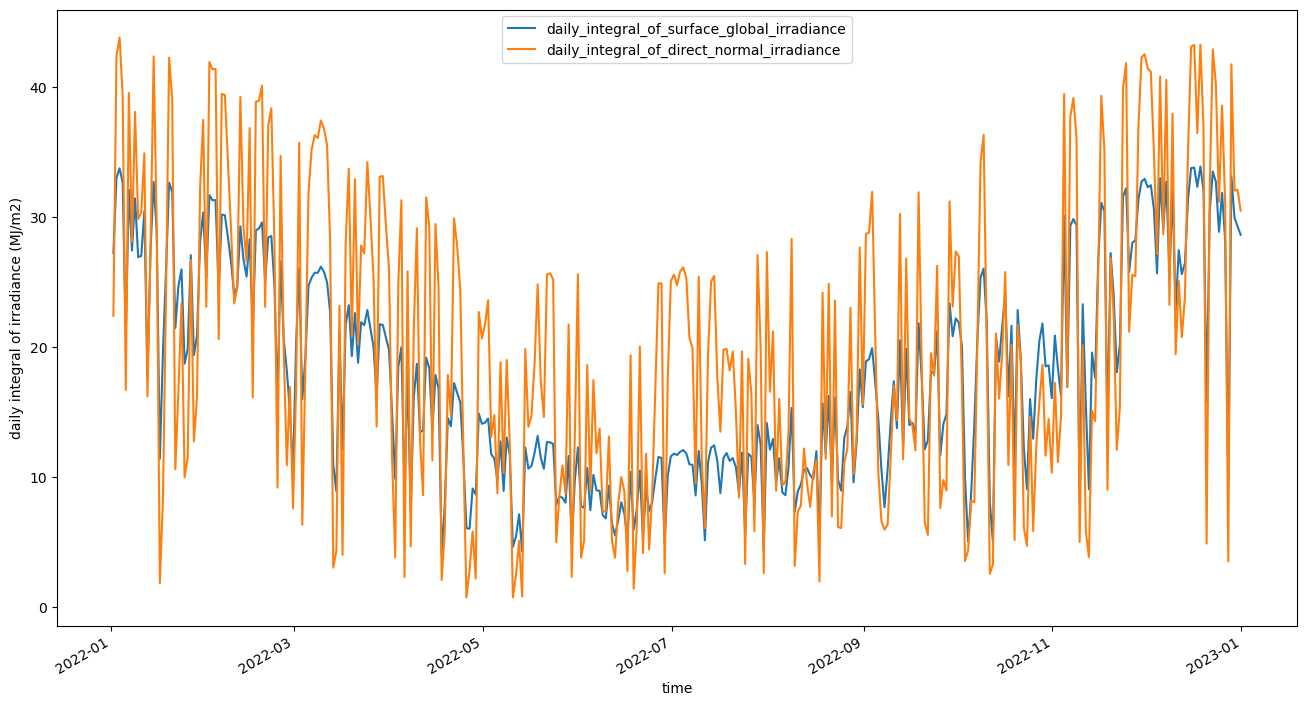

In [7]:
daily_solar_irrd.daily_integral_of_surface_global_irradiance.mean(["latitude", "longitude"]).plot(
    figsize=(16, 8), label="daily_integral_of_surface_global_irradiance"
)
daily_solar_irrd.daily_integral_of_direct_normal_irradiance.mean(["latitude", "longitude"]).plot(
    label="daily_integral_of_direct_normal_irradiance"
)
plt.ylabel('daily integral of irradiance (MJ/m2)')
plt.legend()

### Compare across locations

We change the location to another solar farm located in WA: 

In [8]:
# Ambrisolar 1 Solar Farm, WA
lat=-31.540
lon=118.250

# Define the analysis region (Lat-Lon box)
lat_range = (lat-buffer,lat+buffer)
lon_range = (lon-buffer,lon+buffer)

display_map(x=lon_range, y=lat_range)

We also load the daily measurements:

In [9]:
daily_solar_irrd_2 = load_solar_irradiance(lat_range, lon_range, time, var_names=var_names)
daily_solar_irrd_2

loading daily observations...


  0%|          | 1/366 [00:00<02:22,  2.57it/s]

Dataset time attribute out of queried time range, skipping it...


100%|██████████| 366/366 [02:36<00:00,  2.34it/s]


merging datasets...


<xarray.Dataset>
Dimensions:                                      (time: 365, latitude: 6,
                                                  longitude: 6)
Coordinates:
  * time                                         (time) datetime64[ns] 2022-0...
  * latitude                                     (latitude) float32 -31.58 .....
  * longitude                                    (longitude) float32 118.2 .....
Data variables:
    daily_integral_of_surface_global_irradiance  (time, latitude, longitude) float64 ...
    daily_integral_of_direct_normal_irradiance   (time, latitude, longitude) float64 ...
Attributes: (12/55)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    acknowledgment:                  The following acknowledgement is require...
    cdm_data_type:                   grid
    comment:                         Solar radiation data derived from satell...
    contributor_name:                Mines ParisTech; Commonwealth of Austral...
    ...                              ...
    source:                          IDE00326.202201011830.nc [uuid: dc269487...
    uuid:                            c85fd455-49f1-4e5b-a0a8-40b1bdc3ed3a
    date_created:                    20220427T044245Z
    quality:                         0
    quality_meaning:                 0: no_known_issues 1: medium 2: low 4: poor
    history:                         heliosat-4; post_process_p1s.py, post_pr...

Now we plot the time-series daily integral of surface global irradiance for the two locations together, we can see that the WA location show slightly higher values compared to the NSW location for most of the days:

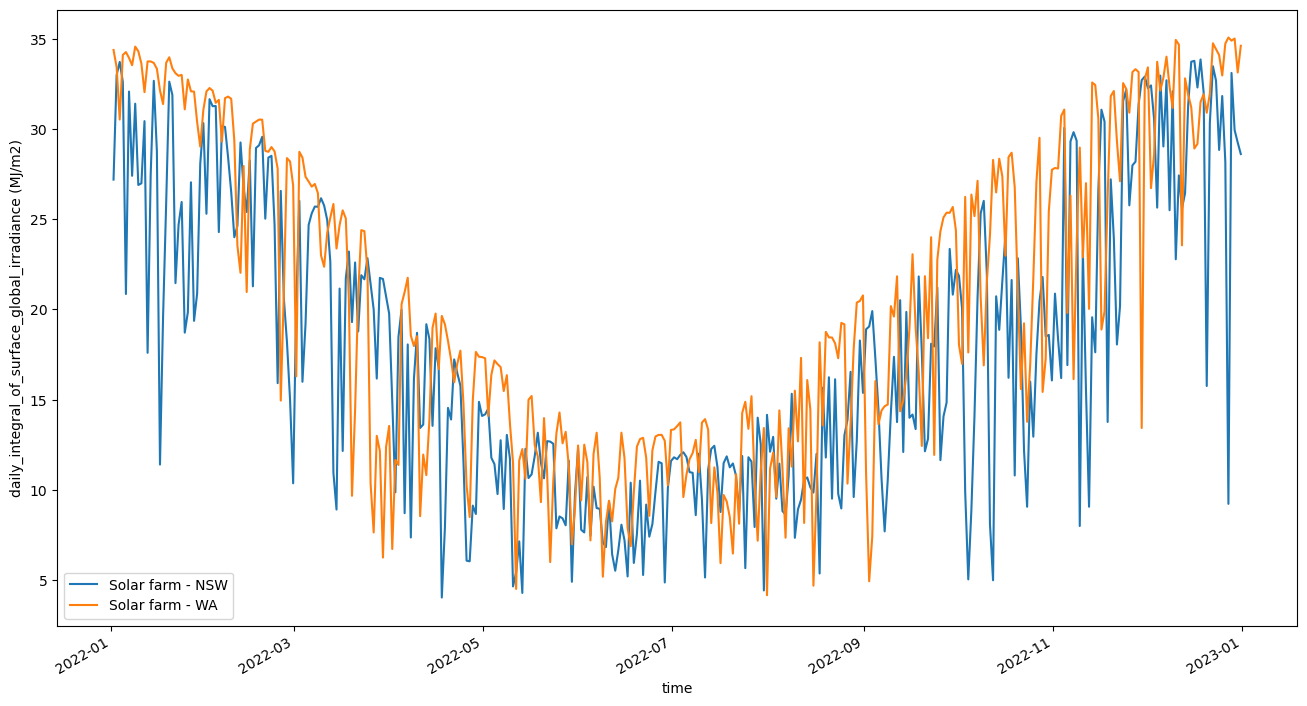

In [10]:
daily_solar_irrd.daily_integral_of_surface_global_irradiance.mean(["latitude", "longitude"]).plot(
    figsize=(16, 8), label="Solar farm - NSW"
)
daily_solar_irrd_2.daily_integral_of_surface_global_irradiance.mean(["latitude", "longitude"]).plot(
    label="Solar farm - WA"
)
plt.ylabel('daily_integral_of_surface_global_irradiance (MJ/m2)')
plt.legend()

## Next steps

When you are done, if you would like to do the analysis for another location or time range, return to the "Analysis parameters" and "Compare across locations" cells, modify the lat/lon or time_range and rerun the analysis.

***

## Additional information

**License:** The code in this notebook and its dependent modules is licensed under the [CC BY-NC 4.0](https://creativecommons.org/licenses/by-nc/4.0/) license. 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** August 2023

**Compatible datacube version:** 

In [11]:
print(datacube.__version__)

1.8.13


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)